In [1]:
'''
Car Sales Prediction
Lachandra Ash
11/14/2022
'''

'\nCar Sales Prediction\nLachandra Ash\n11/14/2022\n'

In [2]:
#Import the neccessary libraries and modules.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
%matplotlib inline
from sklearn.model_selection import cross_val_score
from time import strptime,time,mktime
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.decomposition import PCA
from seaborn import heatmap,pairplot
from sklearn.feature_selection import SelectKBest,mutual_info_regression

In [3]:
#Import the adult csv dataset.
df=pd.read_csv('Car_sales.csv')
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [4]:
#Print the first five records of the adult csv dataset.
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [5]:
#Pre-Processing/Cleaning Adult Dataset

In [6]:
#Check dataframe for missing values.
df.isna()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
153,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#Count the the number of missing values in the dataframe.
df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [8]:
#Use replace method for missing values.
df.replace(0)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [9]:
#Display duplicates witin the dataframe.
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
152    False
153    False
154    False
155    False
156    False
Length: 157, dtype: bool

In [10]:
#Display the sum of the duplicates.
df.duplicated().sum()

0

In [11]:
#Exploratory Data Analysis

In [12]:
#Display the dataframe index.
df.index

RangeIndex(start=0, stop=157, step=1)

In [13]:
#Display the dtypes of the dataset.
df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [14]:
#Display the dataframe's information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [15]:
#Display the dataframe's shape.
df.shape

(157, 16)

In [16]:
#Describe the dataframe.
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [17]:
#Display the sum of the dataframe
df.sum()

Manufacturer           AcuraAcuraAcuraAcuraAudiAudiAudiBMWBMWBMWBuick...
Model                  IntegraTLCLRLA4A6A8323i328i528iCenturyRegalPar...
Sales_in_thousands                                              8320.698
__year_resale_value                                              2186.83
Vehicle_type           PassengerPassengerPassengerPassengerPassengerP...
Price_in_thousands                                              4245.567
Engine_size                                                        477.5
Horsepower                                                       29008.0
Wheelbase                                                        16768.0
Width                                                            11099.4
Length                                                           29225.6
Curb_weight                                                      523.594
Fuel_capacity                                                     2800.5
Fuel_efficiency                                    

In [18]:
#Display the correlation of the dataframe
df.corr()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.279034,-0.304734,0.019983,-0.197756,0.358179,0.140918,0.254980,0.008628,0.086540,-0.016764,-0.223252
__year_resale_value,-0.279034,1.000000,0.953840,0.531330,0.769081,-0.052270,0.178767,0.026548,0.361557,0.325567,-0.399880,0.827123
Price_in_thousands,-0.304734,0.953840,1.000000,0.626875,0.839744,0.110513,0.329136,0.156935,0.526224,0.423282,-0.492157,0.897945
Engine_size,0.019983,0.531330,0.626875,1.000000,0.837360,0.472130,0.690398,0.541424,0.760043,0.663022,-0.734622,0.818528
Horsepower,-0.197756,0.769081,0.839744,0.837360,1.000000,0.286308,0.539158,0.393364,0.610131,0.499907,-0.611332,0.992994
Wheelbase,0.358179,-0.052270,0.110513,0.472130,0.286308,1.000000,0.683135,0.839639,0.651016,0.654044,-0.497931,0.258852
Width,0.140918,0.178767,0.329136,0.690398,0.539158,0.683135,1.000000,0.710435,0.720927,0.656302,-0.602546,0.512025
Length,0.254980,0.026548,0.156935,0.541424,0.393364,0.839639,0.710435,1.000000,0.627163,0.563540,-0.446756,0.354095
Curb_weight,0.008628,0.361557,0.526224,0.760043,0.610131,0.651016,0.720927,0.627163,1.000000,0.863968,-0.818402,0.612071
Fuel_capacity,0.086540,0.325567,0.423282,0.663022,0.499907,0.654044,0.656302,0.563540,0.863968,1.000000,-0.801512,0.501184


In [19]:
#Display the covariance of the dataframe. 
df.cov()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,4628.002257,-236.697884,-299.132802,1.424722,-765.259781,186.793099,33.198257,233.739026,0.372119,22.962847,-4.926970,-383.926355
__year_resale_value,-236.697884,131.180007,155.716842,6.428131,518.629588,-4.795655,7.231822,4.216069,2.467355,14.033919,-20.182340,246.728245
Price_in_thousands,-299.132802,155.716842,205.969949,9.428340,684.494665,12.158523,16.356943,30.338299,4.770211,23.691990,-30.506022,324.013503
Engine_size,1.424722,6.428131,9.428340,1.091300,49.598627,3.768786,2.489581,7.597006,0.498677,2.692882,-3.304906,21.567370
Horsepower,-765.259781,518.629588,684.494665,49.598627,3214.926385,124.047080,105.525161,299.579669,21.706737,110.202680,-149.250064,1418.009911
Wheelbase,186.793099,-4.795655,12.158523,3.768786,124.047080,58.389512,18.018903,86.177272,3.142777,19.430864,-16.371259,49.891528
Width,33.198257,7.231822,16.356943,2.489581,105.525161,18.018903,11.915419,32.939097,1.567749,8.807968,-8.919837,44.578602
Length,233.739026,4.216069,30.338299,7.597006,299.579669,86.177272,32.939097,180.412023,5.310587,29.428948,-25.706774,119.922115
Curb_weight,0.372119,2.467355,4.770211,0.498677,21.706737,3.142777,1.567749,5.310587,0.397532,2.124608,-2.229990,9.690174
Fuel_capacity,22.962847,14.033919,23.691990,2.692882,110.202680,19.430864,8.807968,29.428948,2.124608,15.115932,-13.430150,49.144887


In [20]:
#The datatypes of the columns are modified to category.
df.Model = df.Model.astype('category')
df.Manufacturer = df.Manufacturer.astype('category')
df.Vehicle_type = df.Vehicle_type.astype('category')

In [21]:
#Display the informatio of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Manufacturer         157 non-null    category
 1   Model                157 non-null    category
 2   Sales_in_thousands   157 non-null    float64 
 3   __year_resale_value  121 non-null    float64 
 4   Vehicle_type         157 non-null    category
 5   Price_in_thousands   155 non-null    float64 
 6   Engine_size          156 non-null    float64 
 7   Horsepower           156 non-null    float64 
 8   Wheelbase            156 non-null    float64 
 9   Width                156 non-null    float64 
 10  Length               156 non-null    float64 
 11  Curb_weight          155 non-null    float64 
 12  Fuel_capacity        156 non-null    float64 
 13  Fuel_efficiency      154 non-null    float64 
 14  Latest_Launch        157 non-null    object  
 15  Power_perf_factor    15

In [22]:
#Display the value counts of the manafacturer column.
manu_count = df['Manufacturer'].value_counts(dropna = False)
manu_count

Dodge         11
Ford          11
Mercedes-B     9
Toyota         9
Chevrolet      9
Nissan         7
Chrysler       7
Mitsubishi     7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

In [23]:
#Display the value counts of the sales in thousands column.
Sales_count = df['Sales_in_thousands'].value_counts(dropna = False)
Sales_count

16.919     1
1.112      1
42.643     1
88.094     1
79.853     1
          ..
155.787    1
125.338    1
220.650    1
540.561    1
18.969     1
Name: Sales_in_thousands, Length: 157, dtype: int64

In [24]:
#Display the value counts of the __year_resale_value column.
__year_resale_value_count = df['__year_resale_value'].value_counts(dropna = False)
__year_resale_value_count

NaN       36
7.750      2
18.225     2
16.575     2
12.025     2
          ..
15.510     1
15.060     1
58.470     1
12.275     1
13.760     1
Name: __year_resale_value, Length: 118, dtype: int64

In [25]:
#Display the value counts of Vehicle_type column.
Vehicle_type_count = df['Vehicle_type'].value_counts(dropna = False)
Vehicle_type_count

Passenger    116
Car           41
Name: Vehicle_type, dtype: int64

In [26]:
#Display the value counts of Price_in_thousands column.
Price_in_thousands_count = df['Price_in_thousands'].value_counts(dropna = False)
Price_in_thousands_count

18.890    2
NaN       2
38.900    2
12.640    2
24.150    1
         ..
26.935    1
12.885    1
15.350    1
20.550    1
36.000    1
Name: Price_in_thousands, Length: 153, dtype: int64

In [27]:
#Display the value counts of Engine_size column.
Engine_size_count = df['Engine_size'].value_counts(dropna = False)
Engine_size_count

2.0    17
3.0    14
2.4    11
2.5    11
4.6     9
1.8     8
3.5     8
3.8     8
4.0     7
3.4     7
3.2     6
2.3     6
1.9     5
3.3     5
2.2     4
2.7     4
3.1     4
2.8     3
5.7     2
4.7     2
5.0     2
4.3     2
5.2     2
3.9     2
5.4     1
NaN     1
1.5     1
1.6     1
8.0     1
1.0     1
4.2     1
2.9     1
Name: Engine_size, dtype: int64

In [28]:
#Display the value counts of Horsepower column.
Horsepower = df['Horsepower'].value_counts(dropna = False)
Horsepower

150.0    9
170.0    9
200.0    8
210.0    7
115.0    6
        ..
227.0    1
290.0    1
113.0    1
154.0    1
201.0    1
Name: Horsepower, Length: 67, dtype: int64

In [29]:
#Display the value counts of Wheelbase column.
Wheelbase = df['Wheelbase'].value_counts(dropna = False)
Wheelbase

112.2    8
107.0    5
113.0    5
102.4    4
109.0    4
        ..
100.4    1
114.5    1
93.4     1
101.4    1
109.9    1
Name: Wheelbase, Length: 89, dtype: int64

In [30]:
#Display the value counts of Width column.
Width = df['Width'].value_counts(dropna = False)
Width

66.7    6
74.4    6
68.3    5
70.3    5
72.7    5
       ..
72.3    1
70.5    1
72.0    1
79.9    1
72.1    1
Name: Width, Length: 79, dtype: int64

In [31]:
#Display the value counts of Length column.
Length = df['Length'].value_counts(dropna = False)
Length

186.3    4
189.2    3
192.0    3
190.4    3
163.3    2
        ..
204.6    1
190.7    1
174.8    1
197.6    1
189.8    1
Name: Length, Length: 128, dtype: int64

In [32]:
#Display the value counts of Curb_weight column.
Curb_weight = df['Length'].value_counts(dropna = False)
Curb_weight

186.3    4
189.2    3
192.0    3
190.4    3
163.3    2
        ..
204.6    1
190.7    1
174.8    1
197.6    1
189.8    1
Name: Length, Length: 128, dtype: int64

In [33]:
#Display the value counts of Fuel_capacity column.
Fuel_capacity = df['Fuel_capacity'].value_counts(dropna = False)
Fuel_capacity

18.5    14
17.0     9
20.0     8
19.0     8
16.0     7
13.2     6
15.9     6
15.0     5
14.5     5
17.5     5
21.1     4
17.2     4
18.0     4
16.4     4
12.1     3
19.8     3
21.0     3
25.0     3
26.0     3
16.6     3
25.4     2
16.9     2
23.2     2
15.8     2
13.1     2
19.4     2
15.3     2
11.9     2
15.2     2
17.9     2
32.0     2
12.5     2
30.0     2
16.8     2
17.1     1
10.3     1
23.7     1
14.6     1
13.7     1
20.9     1
15.1     1
14.3     1
12.0     1
19.1     1
14.0     1
15.7     1
NaN      1
19.5     1
24.3     1
16.3     1
22.5     1
20.5     1
18.4     1
22.0     1
12.7     1
25.1     1
Name: Fuel_capacity, dtype: int64

In [34]:
#Display the value counts of Fuel_efficiency column.
Fuel_efficiency= df['Fuel_efficiency'].value_counts(dropna = False)
Fuel_efficiency

25.0    23
24.0    16
27.0    15
22.0    14
21.0    14
23.0    14
26.0    12
19.0     6
20.0     5
15.0     5
18.0     5
30.0     5
33.0     4
31.0     3
28.0     3
17.0     3
16.0     3
NaN      3
29.0     2
32.0     1
45.0     1
Name: Fuel_efficiency, dtype: int64

In [35]:
#Display the value counts of Latest_Launch column.
Latest_Launch= df['Fuel_efficiency'].value_counts(dropna = False)
Latest_Launch

25.0    23
24.0    16
27.0    15
22.0    14
21.0    14
23.0    14
26.0    12
19.0     6
20.0     5
15.0     5
18.0     5
30.0     5
33.0     4
31.0     3
28.0     3
17.0     3
16.0     3
NaN      3
29.0     2
32.0     1
45.0     1
Name: Fuel_efficiency, dtype: int64

In [36]:
#Display the value counts of Power_perf_factor column.
Power_perf_factor= df['Power_perf_factor'].value_counts(dropna = False)
Power_perf_factor

NaN          2
52.084899    2
58.280150    1
86.272523    1
63.313728    1
            ..
47.389531    1
89.401935    1
42.879097    1
54.269548    1
85.735655    1
Name: Power_perf_factor, Length: 155, dtype: int64

In [37]:
#Display the number of features within the dataset.
id_col, target_col = 'id', 'Prices_in_thousands'
features = [c for c in df.columns if c not in [id_col, target_col]]
print('There are',len(features),'number of features')

There are 16 number of features


In [38]:
#Display the categorical columns
cat_cols = [df.columns[i] 
            for i in range(1, df.shape[1]-1)  
            if df.iloc[:,i].dtype=='O']
cat_cols

['Latest_Launch']

In [39]:
num_cols = [c for c in features if c not in cat_cols]
num_cols

['Manufacturer',
 'Model',
 'Sales_in_thousands',
 '__year_resale_value',
 'Vehicle_type',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

In [40]:
#Data Visualization

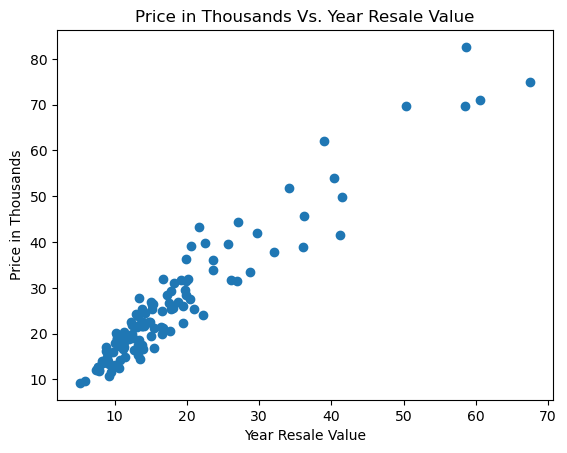

In [41]:
#Plot the scatter of a year resale value and price in thousands.
plt.scatter(df.__year_resale_value,df.Price_in_thousands)
plt.xlabel('Year Resale Value')
plt.ylabel('Price in Thousands')
plt.title('Price in Thousands Vs. Year Resale Value')
plt.show()

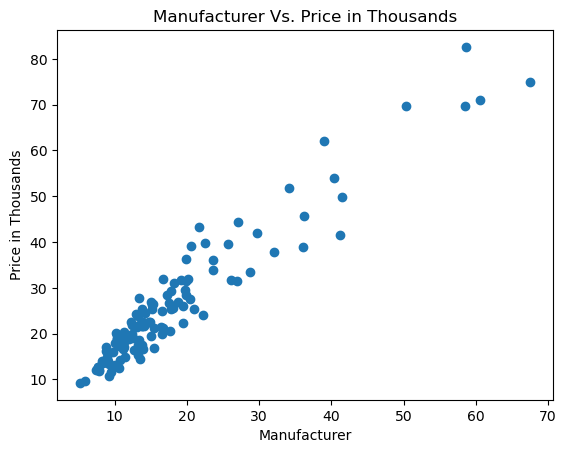

In [42]:
#Plot the scatter of manufacturer and price in thousands.
plt.scatter(df.__year_resale_value,df.Price_in_thousands)
plt.xlabel('Manufacturer')
plt.ylabel('Price in Thousands')
plt.title('Manufacturer Vs. Price in Thousands')
plt.show()

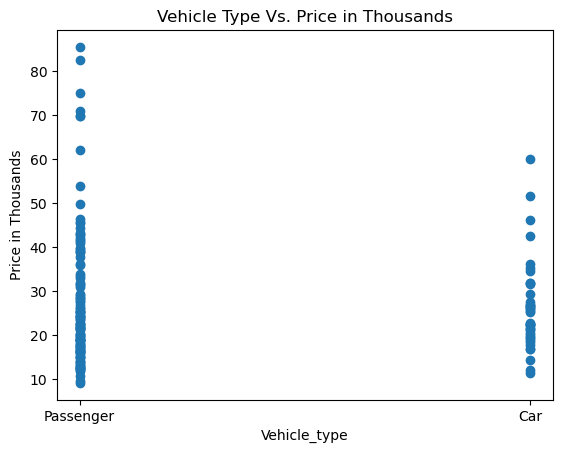

In [43]:
#Plot the scatter of vehicle type and price in thousands.
plt.scatter(df.Vehicle_type,df.Price_in_thousands)
plt.xlabel('Vehicle_type')
plt.ylabel('Price in Thousands')
plt.title('Vehicle Type Vs. Price in Thousands')
plt.show()

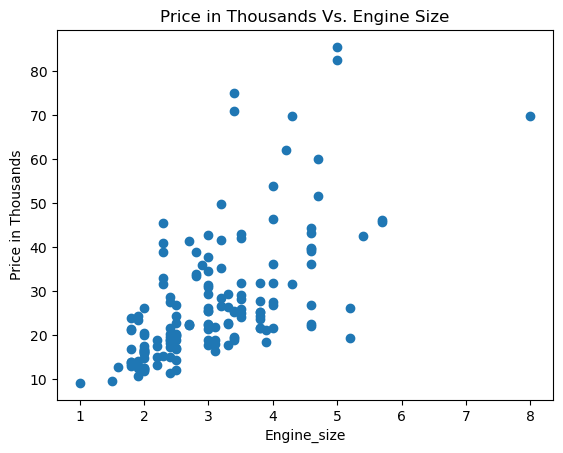

In [44]:
#Plot the scatter of Engine_size and price in thousands.
plt.scatter(df.Engine_size,df.Price_in_thousands)
plt.xlabel('Engine_size')
plt.ylabel('Price in Thousands')
plt.title('Price in Thousands Vs. Engine Size')
plt.show()

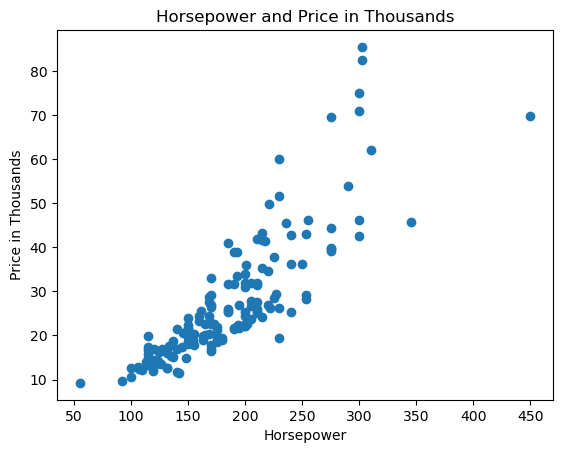

In [45]:
#Plot the scatter of Horsepowere and price in thousands.
plt.scatter(df.Horsepower,df.Price_in_thousands)
plt.xlabel('Horsepower')
plt.ylabel('Price in Thousands')
plt.title('Horsepower and Price in Thousands')
plt.show()

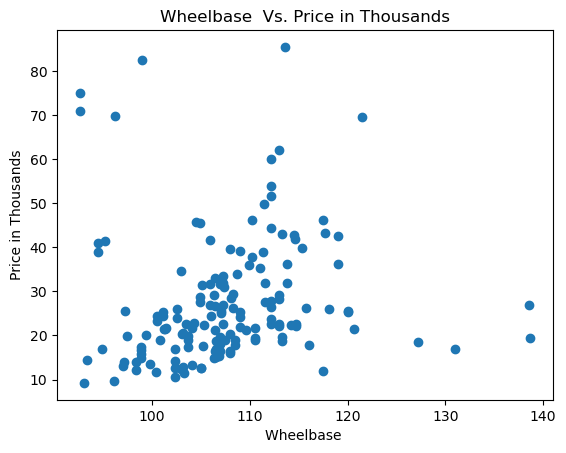

In [46]:
#Plot the scatter of Wheelbase  and price in thousands.
plt.scatter(df.Wheelbase ,df.Price_in_thousands)
plt.xlabel('Wheelbase ')
plt.ylabel('Price in Thousands')
plt.title('Wheelbase  Vs. Price in Thousands')
plt.show()

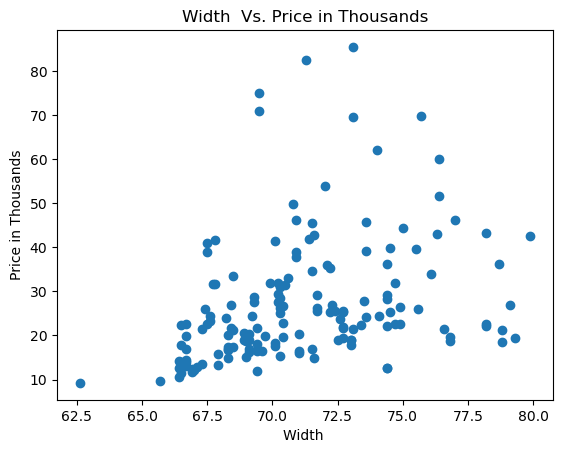

In [47]:
#Plot the scatter of Width and price in thousands.
plt.scatter(df.Width ,df.Price_in_thousands)
plt.xlabel('Width ')
plt.ylabel('Price in Thousands')
plt.title('Width  Vs. Price in Thousands')
plt.show()

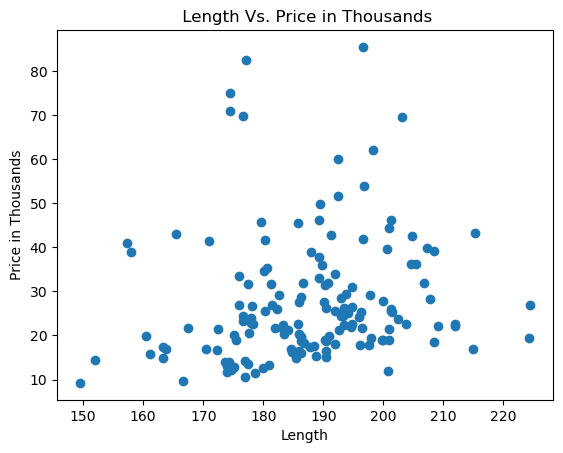

In [48]:
#Plot the scatter of  Length  and price in thousands.
plt.scatter(df. Length,df.Price_in_thousands)
plt.xlabel('Length')
plt.ylabel('Price in Thousands')
plt.title(' Length Vs. Price in Thousands')
plt.show()

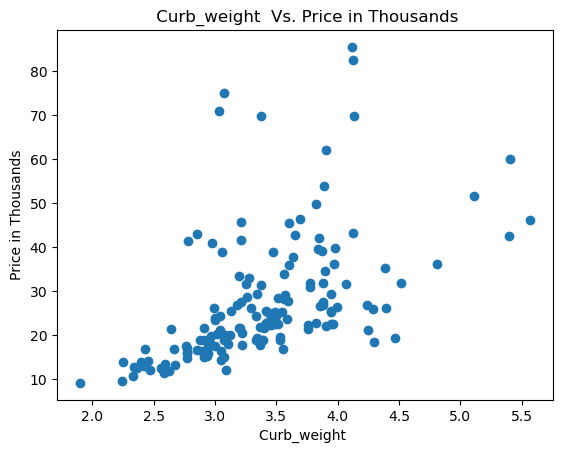

In [49]:
#Plot the scatter of  Curb_weight and price in thousands.
plt.scatter(df. Curb_weight ,df.Price_in_thousands)
plt.xlabel('Curb_weight ')
plt.ylabel('Price in Thousands')
plt.title(' Curb_weight  Vs. Price in Thousands')
plt.show()

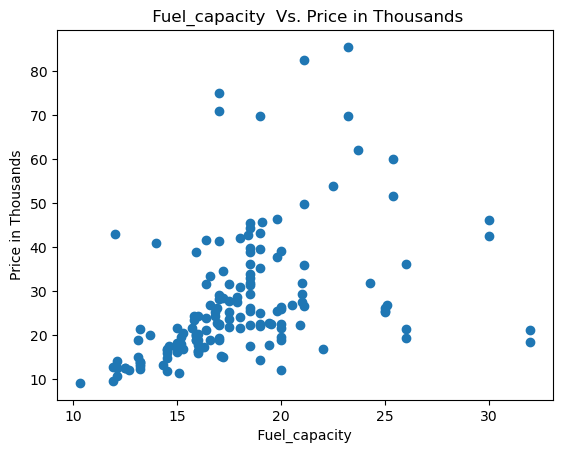

In [50]:
#Plot the scatter of   Fuel_capacity and price in thousands.
plt.scatter(df. Fuel_capacity,df.Price_in_thousands)
plt.xlabel(' Fuel_capacity ')
plt.ylabel('Price in Thousands')
plt.title(' Fuel_capacity  Vs. Price in Thousands')
plt.show()

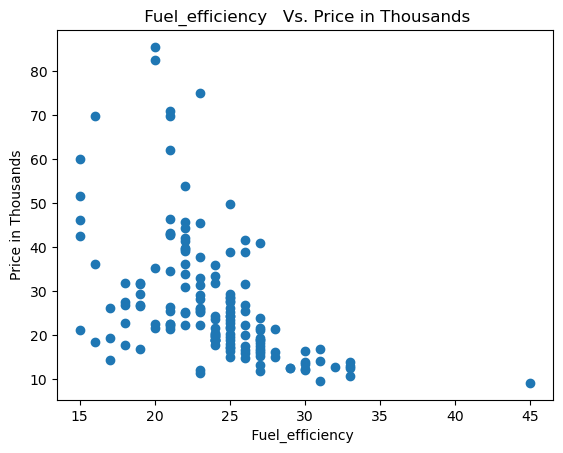

In [51]:
#Plot the scatter of Fuel_efficiency  and price in thousands.
plt.scatter(df. Fuel_efficiency ,df.Price_in_thousands)
plt.xlabel(' Fuel_efficiency  ')
plt.ylabel('Price in Thousands')
plt.title(' Fuel_efficiency   Vs. Price in Thousands')
plt.show()

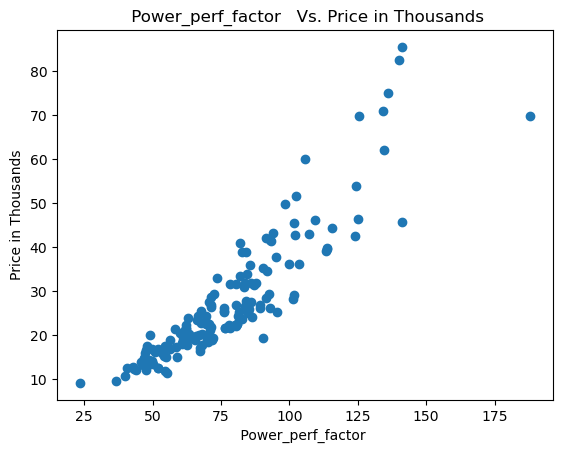

In [52]:
#Plot the scatter of Power_perf_factor and price in thousands.
plt.scatter(df. Power_perf_factor ,df.Price_in_thousands)
plt.xlabel(' Power_perf_factor  ')
plt.ylabel('Price in Thousands')
plt.title(' Power_perf_factor   Vs. Price in Thousands')
plt.show()

Text(0.5, 1.0, 'The Manufacturer Countplot')

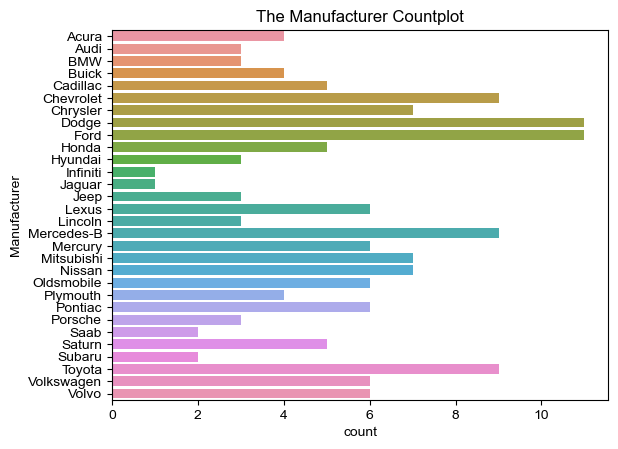

In [53]:
#Display the countplot of Manufacturer.
sns.countplot(y=df['Manufacturer'])
sns.set_style("white")
plt.title('The Manufacturer Countplot')

Text(0.5, 1.0, 'The Engine Size Countplot')

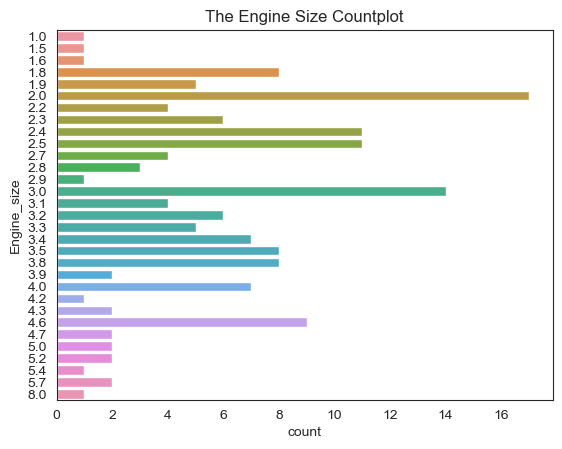

In [54]:
#Display the countplot of Engine_size
sns.countplot(y=df['Engine_size'])
sns.set_style("white")
plt.title('The Engine Size Countplot')

Text(0.5, 1.0, 'Sales in Thousands')

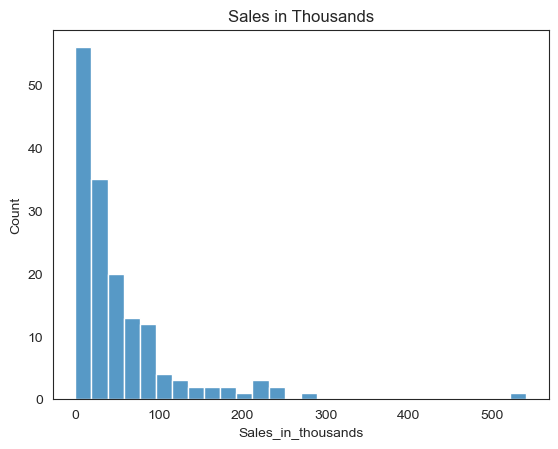

In [55]:
#Display the histogram for the Sales_in_thousands.
sns.histplot(df['Sales_in_thousands'])
plt.title('Sales in Thousands')

Text(0.5, 1.0, 'Year Resale Value')

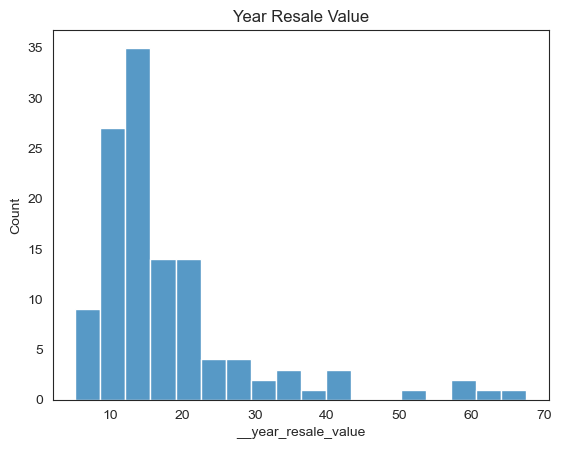

In [56]:
#Display the histogram for the __year_resale_value.
sns.histplot(df['__year_resale_value'])
plt.title('Year Resale Value')

Text(0.5, 1.0, 'Price in Thousands')

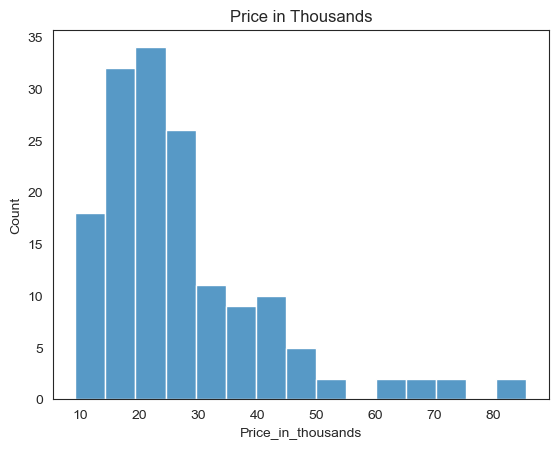

In [57]:
#Display the histogram for Price_in_thousands.
sns.histplot(df['Price_in_thousands'])
plt.title('Price in Thousands')

Text(0.5, 1.0, 'Horsepower')

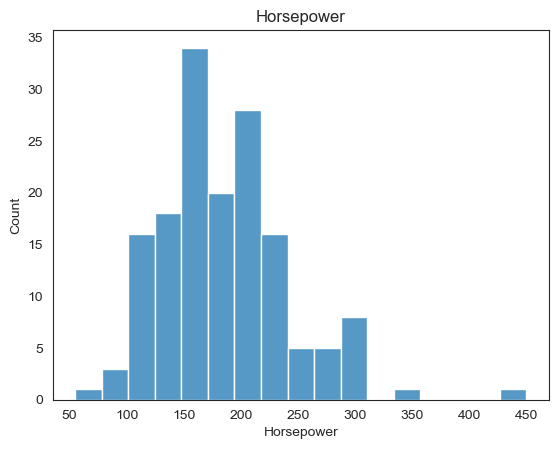

In [58]:
#Display the histogram for Horsepower.
sns.histplot(df['Horsepower'])
plt.title('Horsepower')

Text(0.5, 1.0, 'Power Perfection Factor')

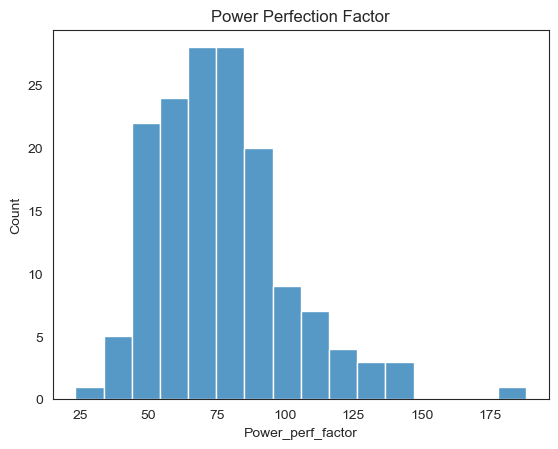

In [59]:
#Display the histogram for Power_perf_factor.
sns.histplot(df['Power_perf_factor'])
plt.title('Power Perfection Factor')

In [60]:
#Use the label encoder to convert the column labels into numeric form.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Latest_Launch'] = le.fit_transform(df['Latest_Launch'])
df['Manufacturer'] = le.fit_transform(df['Manufacturer'])
df['Sales_in_thousands'] = le.fit_transform(df['Sales_in_thousands'])
df['Model'] = le.fit_transform(df['Model'])
df['__year_resale_value'] = le.fit_transform(df['__year_resale_value'])
df['Vehicle_type'] = le.fit_transform(df['Vehicle_type'])
df['Price_in_thousands'] = le.fit_transform(df['Price_in_thousands'])
df['Engine_size'] = le.fit_transform(df['Engine_size'])
df['Horsepower'] = le.fit_transform(df['Horsepower'])
df['Wheelbase'] = le.fit_transform(df['Wheelbase'])
df['Width'] = le.fit_transform(df['Width'])
df['Length'] = le.fit_transform(df['Length'])
df['Curb_weight'] = le.fit_transform(df['Curb_weight'])
df['Fuel_capacity'] = le.fit_transform(df['Fuel_capacity'])
df['Fuel_efficiency'] = le.fit_transform(df['Fuel_efficiency'])
df['Latest_Launch'] = le.fit_transform(df['Latest_Launch'])
df['Power_perf_factor'] = le.fit_transform(df['Power_perf_factor'])
df.head() 


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,0,79,48,69,1,60,3,18,21,8,14,17,7,13,47,34
1,0,143,93,86,1,103,15,51,52,31,82,90,28,10,93,118
2,0,25,39,79,1,152,15,51,45,34,79,84,28,11,9,154
3,0,115,23,103,1,131,18,45,72,39,96,112,31,7,52,119
4,1,8,60,94,1,78,3,23,25,15,33,38,22,12,20,49


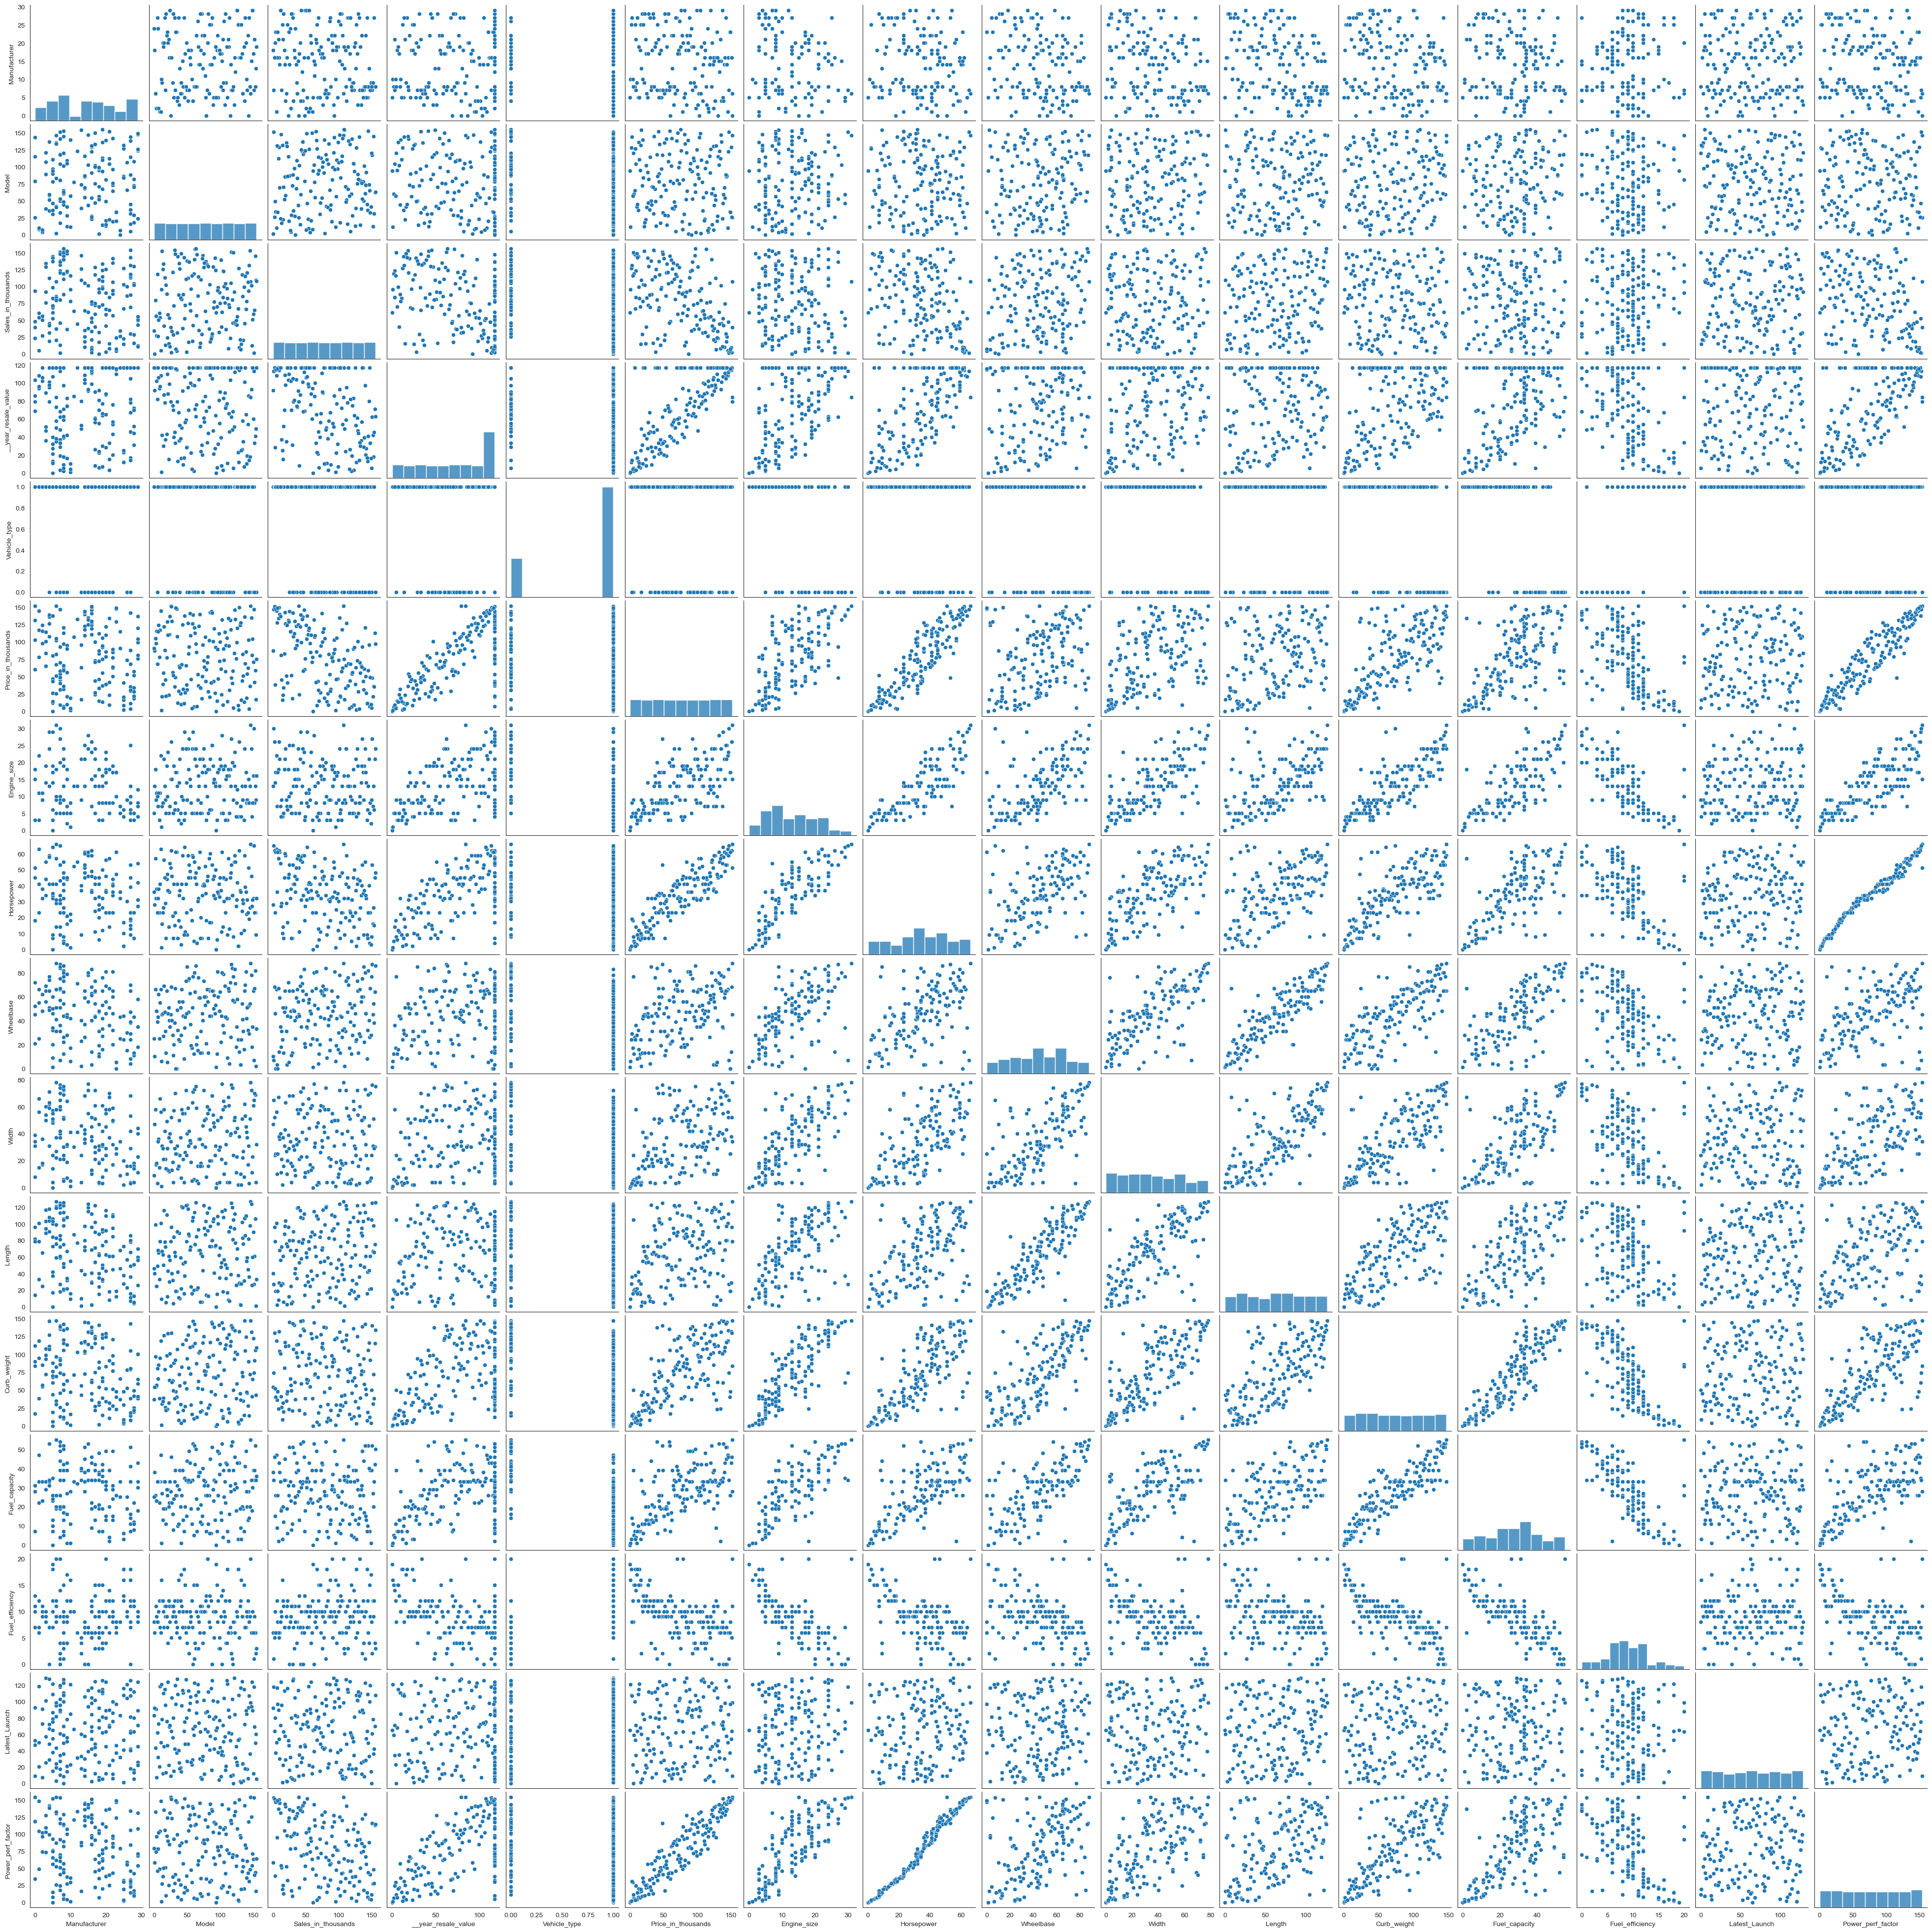

In [61]:
#Display the pairplot of the df dataframe.
sns.pairplot(df)

<AxesSubplot:>

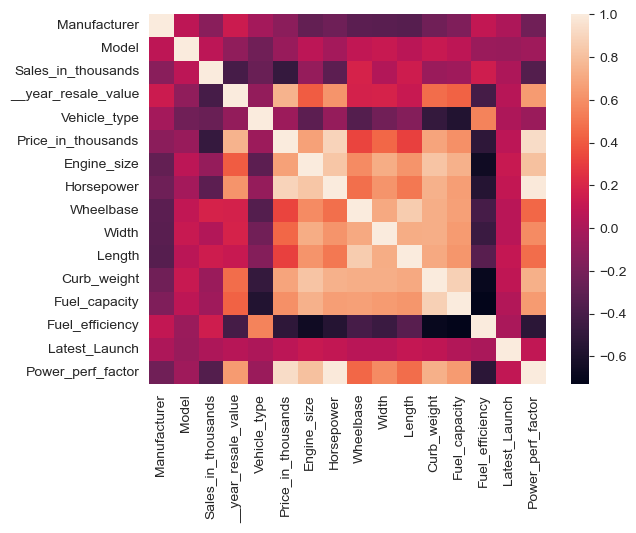

In [62]:
#Display the correlation heatmap of the dataframe.
sns.heatmap(df.corr())

In [66]:
#Drop the income column from the dataframe.
x = df.drop(['Price_in_thousands'], axis = 1)
y = df['Price_in_thousands']

In [67]:
#Modeling

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) 
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [70]:
#Import the sklearn metrics libraries.
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [71]:
#Conduct the prediction tests and print the metrics.
y_pred = gb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.0
              precision    recall  f1-score   support

           7       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       1.0
          28       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       1.0
          43       0.00      0.00      0.00       1.0
          47       0.00      0.00      0.00       1.0
          49       0.00      0.00      0.00       1.0
          50       0.00      0.00      0.00       1.0
          51       0.00      0.00      0.00       1.0
          57       0.00      0.00      0.00       1.0
          58       0.00      0.00      0.00       1.0
          59       0.00      0.00      0.00       1.0
          69       0.00      0.00      0.00       1.0
          7